<a href="https://colab.research.google.com/github/Tiwari666/NLP/blob/main/NLP_NLTK_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load data
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
# Define the text cleaning function
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    # Join words to form the cleaned text
    cleaned_text = ' '.join(filtered_words)
    # Strip whitespace
    cleaned_text = cleaned_text.strip()
    return cleaned_text

In [ ]:
# Apply the cleaning function to the review column
df['cleaned_review'] = df['Review'].apply(clean_text)
df.head()

,Review,Rating,cleaned_review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms 4 experience hotel monaco seattle g...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review          20491 non-null  object
 1   Rating          20491 non-null  int64 
 2   cleaned_review  20491 non-null  object
dtypes: int64(1), object(2)
memory usage: 480.4+ KB


There is no null values in this dataset.

# **Data Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-9-695ae49e03c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', palette='flare').set_title('Rating Distribution Across Dataset')


Text(0.5, 1.0, 'Rating Distribution Across Dataset')

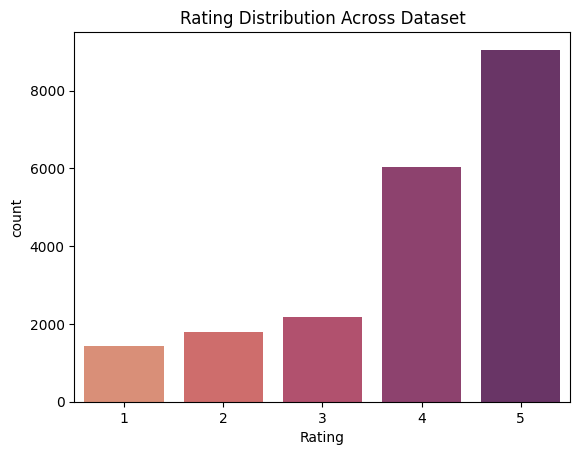

In [ ]:
sns.countplot(data=df, x='Rating', palette='flare').set_title('Rating Distribution Across Dataset')

In [ ]:
# Length of word in sentence
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,cleaned_review,Length
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,593
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,1689
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms 4 experience hotel monaco seattle g...,1427
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,600
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,1281


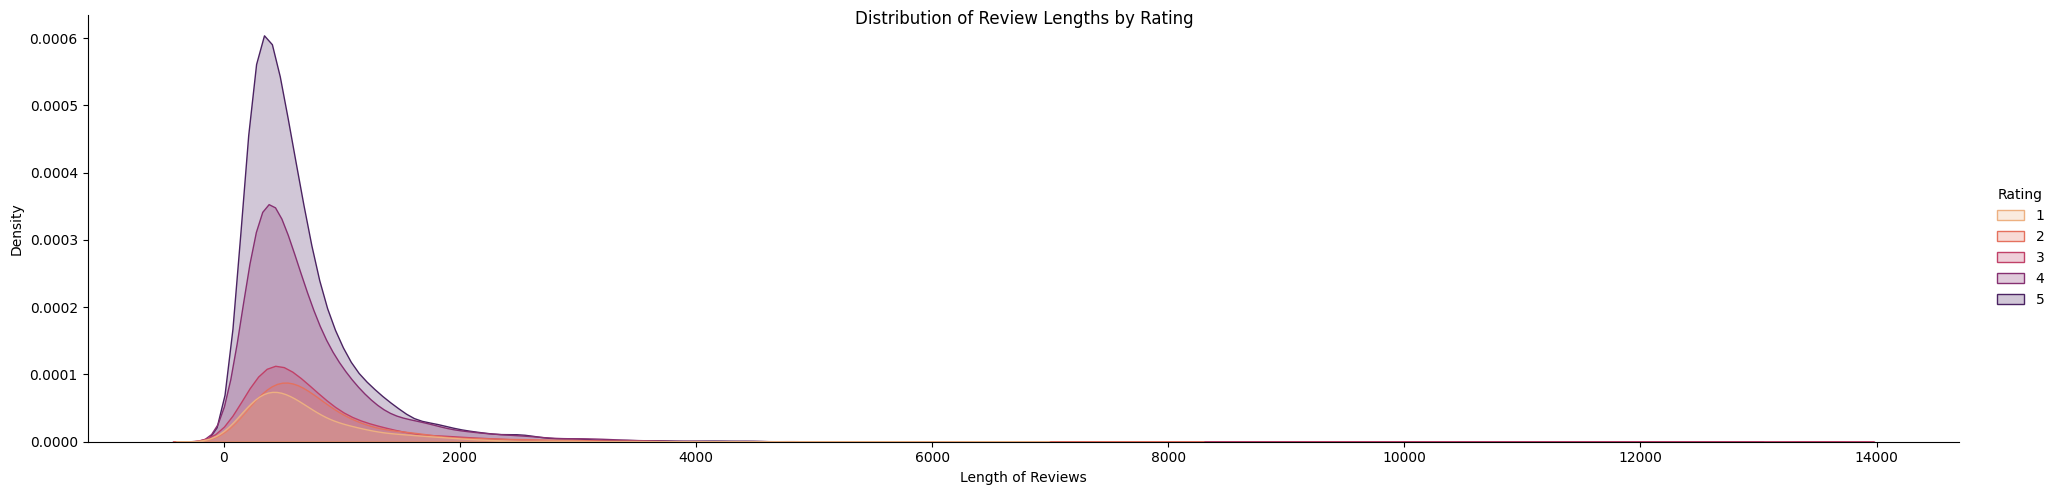

In [ ]:
# Create the plot
plot = sns.displot(data=df, x='Length', hue='Rating', palette='flare', kind='kde', fill=True, aspect=4)
plot.fig.suptitle('Distribution of Review Lengths by Rating')
plt.xlabel('Length of Reviews')
plt.ylabel('Density')
plt.show()

This kind of plot is particularly useful in exploratory data analysis (EDA) to understand how the length of text data relates to categorical ratings. It can help in hypothesis generation, such as whether people tend to write more when they are dissatisfied (possibly in lower ratings).

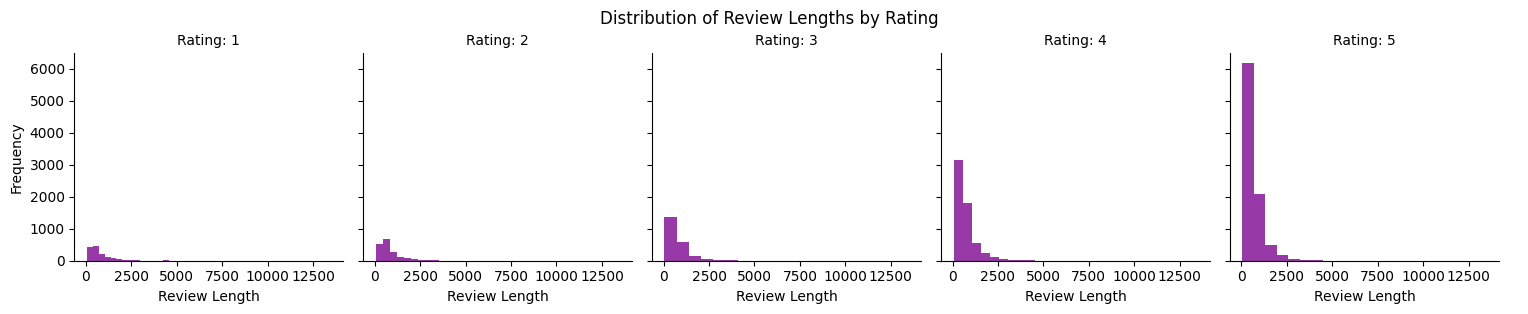

In [ ]:
g = sns.FacetGrid(data=df, col='Rating', col_wrap=5)  # col_wrap controls the number of plots per row
g.map(plt.hist, 'Length', bins=20, color='#973aa8')  # bins parameter helps in adjusting the granularity of the histogram
g.fig.suptitle('Distribution of Review Lengths by Rating', y=1.03)
g.set_titles('Rating: {col_name}')
g.set_axis_labels('Review Length', 'Frequency')
g.add_legend()
plt.show()


Trend of Increasing Detail with Higher Ratings: There is a trend where higher ratings (especially 4 and slightly less so for 5) seem to have a slightly more distributed range of review lengths, suggesting that more positive reviews might occasionally include more detailed feedback compared to more uniformly short negative reviews.

Implications

Marketing and Product Insights: Understanding the length and detail level in reviews across ratings can help businesses identify what aspects of a product or service are being discussed more elaborately. It may also suggest the need to encourage more detailed feedback across all ratings to gain better insights.

Customer Satisfaction: The high frequency of shorter reviews in higher ratings could suggest satisfaction but might also indicate a lack of detailed positive feedback which could be useful for identifying strengths of the product or service that are particularly valued by customers.

<ipython-input-14-614620ec35fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  strip_plot = sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)


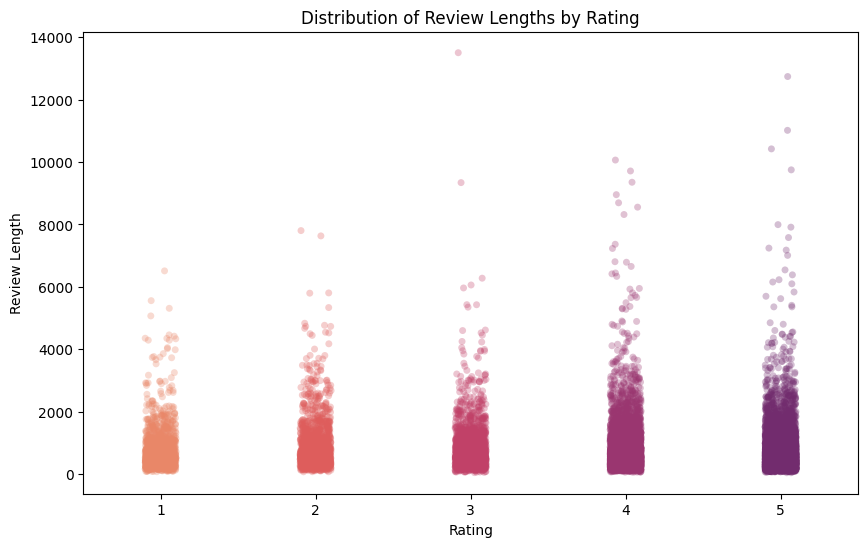

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
strip_plot = sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)

# Adding titles and labels
plt.title('Distribution of Review Lengths by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

Trends and Patterns:

Lengths Shorten with Higher Ratings: As ratings increase from 1 to 5, the concentration of reviews tends to be at shorter lengths. Higher-rated reviews are predominantly shorter, suggesting that users might leave brief positive feedback more frequently than detailed critique.

Fewer Long Reviews for Higher Ratings: Longer reviews are more frequent in lower ratings (1 and 2) and become less common as ratings improve. This could suggest that dissatisfied customers tend to provide more detailed feedback explaining their dissatisfaction.
Color and Density:

The intensity and depth of the color may suggest the density of data points. Darker and more intense colors at the base of the plots for each rating indicate where the bulk of data points lie, which is primarily at shorter review lengths.

# **Model Building:**

In [ ]:
# The rest of the preprocessing steps, feature extraction, and model training follows:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Control the vector's dimensionality
X = vectorizer.fit_transform(df['cleaned_review'])  # Fit and transform the cleaned reviews

In [ ]:
# Print the column names to verify them
print(df.columns)

Index(['Review', 'Rating', 'cleaned_review'], dtype='object')


The choice between word embeddings and vectorization depends on the specific requirements of the task, available computational resources, and the depth of linguistic understanding required.

Word embeddings are generally preferred for their superior handling of language semantics and syntax, but vectorization remains useful for simpler tasks or when computational simplicity is prioritized.



# **Word embeddings**

are dense vector representations of words, capturing their meanings, semantic relationships, and the different contexts in which they appear. Several methods have been developed to generate these embeddings, each with its unique approach and characteristics.

# Common Techniques for Word embeddings:**

1. Word2Vec


2. GloVe (Global Vectors for Word Representation)

3. FastText

4. ELMo (Embeddings from Language Models)

5. BERT (Bidirectional Encoder Representations from Transformers)

6. Transformer-based Embeddings (for deep learning NLP)
Following BERT, several models based on the Transformer architecture have been introduced, including RoBERTa, GPT (Generative Pre-trained Transformer), T5, and others. These models offer embeddings that are contextually aware, but unlike traditional word embeddings, they generate different vectors for the same word based on its contextual use.






# **Common Techniques for Vectorization:**

Vectorization in NLP usually refers to the process of converting text into vectors using methods that count word occurrences or compute word frequencies.

Bag-of-Words (BoW): This method involves counting the number of times each word appears in a document.

TF-IDF (Term Frequency-Inverse Document Frequency): Weighs words based on their frequency in a document and their inverse frequency across all documents, helping to highlight words that are more relevant to a specific document.

In [ ]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [ ]:
# Adjust the mapping function to categorize ratings into three groups
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))
df.head()

,Review,Rating,cleaned_review,Sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,negative
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms 4 experience hotel monaco seattle g...,neutral
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,positive


In [ ]:
# For integer encoding
y = df['Sentiment']

In [ ]:
import numpy as np

In [ ]:
!pip install imbalanced-learn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f'New class distribution: {pd.Series(y_train_smote).value_counts()}')

New class distribution: Sentiment
negative    11306
positive    11306
neutral     11306
Name: count, dtype: int64


# **Train Models**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'BernoulliNB': BernoulliNB()
}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)

    # Store results in the dictionary
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }

    # Print the results
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print("-----------------------------------------------")


Results for DecisionTreeClassifier:
Accuracy: 0.67
Precision: 0.72
Recall: 0.67
F1 Score: 0.69
-----------------------------------------------
Results for RandomForestClassifier:
Accuracy: 0.80
Precision: 0.77
Recall: 0.80
F1 Score: 0.78
-----------------------------------------------
Results for SVC:
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.83
-----------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LogisticRegression:
Accuracy: 0.80
Precision: 0.84
Recall: 0.80
F1 Score: 0.82
-----------------------------------------------
Results for KNeighborsClassifier:
Accuracy: 0.19
Precision: 0.77
Recall: 0.19
F1 Score: 0.12
-----------------------------------------------
Results for BernoulliNB:
Accuracy: 0.68
Precision: 0.67
Recall: 0.68
F1 Score: 0.66
-----------------------------------------------


# **Interpretation:**

SVC (Support Vector Classifier)

Accuracy: 85%
Precision: 82%
Recall: 85%
F1 Score: 83%

Interpretation:

From the above results, SVC appears to be the best model given its high precision, recall, and overall accuracy. However, considering the convergence issue in Logistic Regression, there might be room for improvement there with proper parameter tuning or preprocessing. For applications where false positives and false negatives have severe implications, further tuning and validation are recommended, especially for the top-performing models.

In [ ]:
print("List of models:")
for name in models.keys():
    print(name)  # Print the name of each model

List of models:
DecisionTreeClassifier
RandomForestClassifier
SVC
LogisticRegression
KNeighborsClassifier
BernoulliNB


# **Learning Curve:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Gettingn the trained SVC model from the models dictionary
svc_model = models["SVC"]  # Accessing the SVC model instance


# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curves
train_sizes, train_scores, val_scores = learning_curve(svc_model, X_train_smote, y_train_smote, cv=5, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (SVC Model)")
plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


# ***Cross-Validation for SVC and Logistic Regression***

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# **Cross-Validation for SVC**

In [ ]:
svc_pipe = make_pipeline(MaxAbsScaler(), SVC())
svc_scores = cross_val_score(svc_pipe, X, y, cv=5, scoring='accuracy')

print("SVC Cross-Validation Scores:", svc_scores)
print("Average Accuracy of SVC:", svc_scores.mean())

SVC Cross-Validation Scores: [0.85142718 0.84895071 0.85139092 0.8511469  0.84309419]
Average Accuracy of SVC: 0.8492019801279962


Since the cross-validation scores show less variance and the average accuracy remains close to the original 0.85, this indicates that the model with MaxAbsScaler is stable and generalizes well across different data subsets. This would validate the robustness of our model.

# **Hyperparameters Tuning**


Hyperparameter tuning is the process of searching for the ideal combination of hyperparameters that provides the best performance for a machine learning model on a given dataset. Unlike model parameters, which are learned during training, hyperparameters are set prior to training and control aspects of the model such as its complexity or how fast it learns. Common methods for hyperparameter tuning include grid search, random search, and more sophisticated automated approaches like Bayesian optimization.

For an SVC, the primary hyperparameters to adjust include:

C (Regularization parameter): The strength of the regularization is inversely proportional to C. Lower values of C lead to a smoother decision surface (higher bias, lower variance), while higher values of C try to classify all training examples correctly (lower bias, higher variance).

kernel: Determines the type of hyperplane used to separate the data. Common kernels include linear, poly, rbf (radial basis function), and sigmoid.

gamma: A parameter for non-linear hyperplanes. The higher the gamma value, the more it tries to exactly fit the training data set.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import numpy as np

# **Define the Pipeline and Parameter Distributions**

In [ ]:
# Define a pipeline to include scaling that supports sparse data and the classifier
pipeline = Pipeline([
    ('scaler', MaxAbsScaler()),  # Suitable for sparse matrix
    ('svc', SVC())
])

# Parameter distribution for SVC
param_distributions = {
    'svc__C': np.logspace(-3, 2, 10),
    'svc__kernel': ['rbf', 'linear'],
    'svc__gamma': np.logspace(-3, 2, 10)
}

# **Setup Randomized Search with Cross-Validation**

In [ ]:
# Setup the randomized search with cross-validation
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

# Fit the random search model
random_search.fit(X, y)

# Print results
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.3f}".format(random_search.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END svc__C=0.1668100537200059, svc__gamma=7.742636826811277, svc__kernel=linear; total time= 1.7min
[CV] END svc__C=0.1668100537200059, svc__gamma=7.742636826811277, svc__kernel=linear; total time= 1.7min
[CV] END svc__C=0.1668100537200059, svc__gamma=7.742636826811277, svc__kernel=linear; total time= 1.7min
[CV] END svc__C=0.1668100537200059, svc__gamma=7.742636826811277, svc__kernel=linear; total time= 1.7min
[CV] END svc__C=0.1668100537200059, svc__gamma=7.742636826811277, svc__kernel=linear; total time= 1.7min
[CV] END svc__C=0.001, svc__gamma=7.742636826811277, svc__kernel=linear; total time= 2.7min
[CV] END svc__C=0.001, svc__gamma=7.742636826811277, svc__kernel=linear; total time= 2.7min
[CV] END svc__C=0.001, svc__gamma=7.742636826811277, svc__kernel=linear; total time= 2.8min
[CV] END svc__C=0.001, svc__gamma=7.742636826811277, svc__kernel=linear; total time= 2.8min
[CV] END svc__C=0.001, svc__gamma=7.742636826

svc__C: Regularization parameter that controls the trade-off between achieving a low error on the training data and minimizing the model complexity for better generalization.

svc__gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' that defines how far the influence of a single training example reaches.

svc__kernel=linear: Specifies the use of a linear kernel in the SVM.

total time: Duration required to complete the training for one set of parameters during one fold of cross-validation.